In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv("../Diabetes Prediction/Dataset/diabetes-dataset.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.shape

(2024, 9)

In [5]:
df["Outcome"].value_counts()

0    1322
1     702
Name: Outcome, dtype: int64

In [6]:
df.Outcome.value_counts(normalize=True)

0    0.653162
1    0.346838
Name: Outcome, dtype: float64

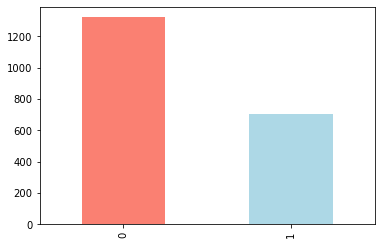

In [7]:
df.Outcome.value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2024 non-null   int64  
 1   Glucose                   2024 non-null   int64  
 2   BloodPressure             2024 non-null   int64  
 3   SkinThickness             2024 non-null   int64  
 4   Insulin                   2024 non-null   int64  
 5   BMI                       2024 non-null   float64
 6   DiabetesPedigreeFunction  2024 non-null   float64
 7   Age                       2024 non-null   int64  
 8   Outcome                   2024 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 142.4 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,3.703063,120.625494,69.250000,21.064723,79.870059,32.615489,0.471242,33.154644,0.346838
std,3.303149,32.458911,19.601385,16.220315,110.616054,9.940985,0.322994,12.101004,0.476081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,2.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.350000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.250000,130.000000,36.800000,0.626000,40.000000,1.000000
max,17.000000,199.000000,189.000000,110.000000,744.000000,212.000000,2.420000,98.000000,1.000000


In [10]:
df.Pregnancies.value_counts()

1     359
0     305
2     288
3     197
4     193
5     144
6     133
7     100
8      98
9      71
10     54
11     25
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

In [11]:
pd.crosstab(df.Outcome, df.Pregnancies)

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,201,277,237,126,126,90,87,44,43,28,32,10,13,8,0,0,0
1,104,82,51,71,67,54,46,56,55,43,22,15,10,14,7,2,3


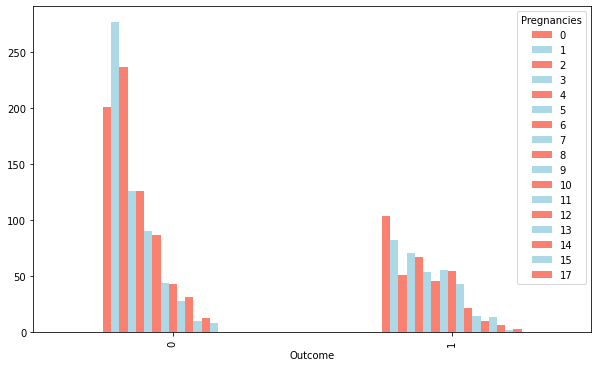

In [12]:
pd.crosstab(df.Outcome, df.Pregnancies).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);

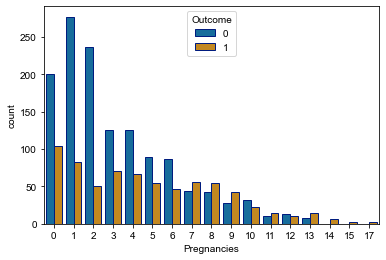

In [13]:
sns.countplot(x='Pregnancies',hue='Outcome',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
sns.set(rc = {'figure.figsize':(15,8)})

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

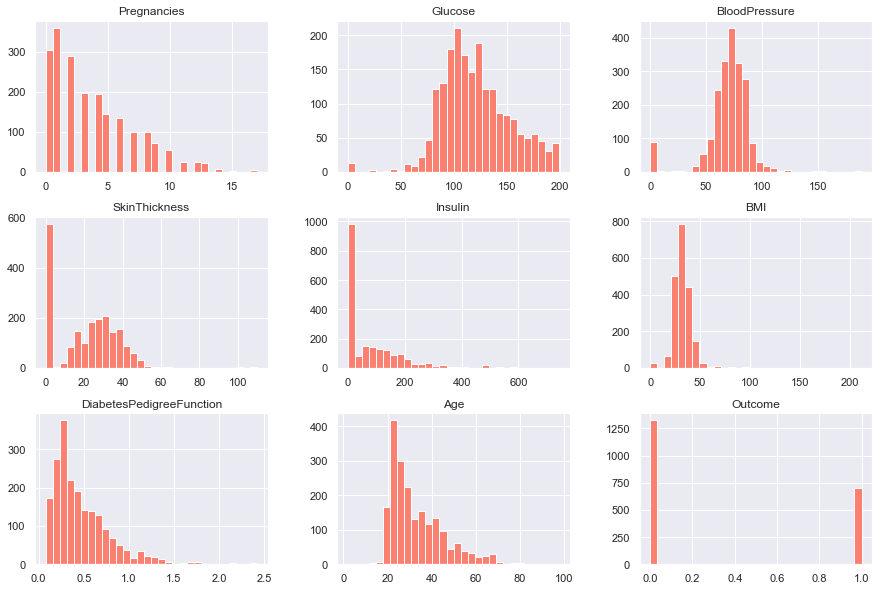

In [14]:
df.hist(bins=30, figsize=(15, 10), color=['salmon'])

In [15]:
corr_matrix = df.corr()
corr_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.113393,0.140915,-0.060100,-0.076881,0.020428,-0.021300,0.524707,0.218920
Glucose,0.113393,1.000000,0.127592,0.051344,0.319169,0.111239,0.116953,0.231975,0.432413
BloodPressure,0.140915,0.127592,1.000000,0.202767,0.082984,0.193077,0.050870,0.242316,0.080966
SkinThickness,-0.060100,0.051344,0.202767,1.000000,0.439772,0.350660,0.176672,-0.103723,0.083764
Insulin,-0.076881,0.319169,0.082984,0.439772,1.000000,0.172536,0.192115,-0.086003,0.116723
BMI,0.020428,0.111239,0.193077,0.350660,0.172536,1.000000,0.106731,0.027441,0.245018
DiabetesPedigreeFunction,-0.021300,0.116953,0.050870,0.176672,0.192115,0.106731,1.000000,0.024994,0.154636
Age,0.524707,0.231975,0.242316,-0.103723,-0.086003,0.027441,0.024994,1.000000,0.232735
Outcome,0.218920,0.432413,0.080966,0.083764,0.116723,0.245018,0.154636,0.232735,1.000000


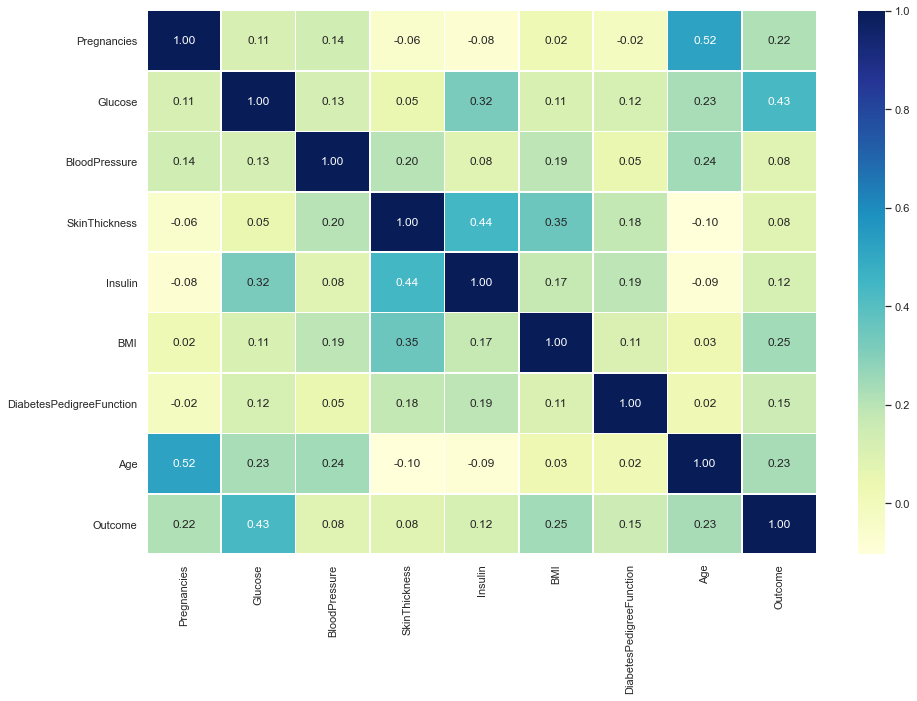

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [17]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2019,False,False,False,False,False,False,False,False,False
2020,False,False,False,False,False,False,False,False,False
2021,False,False,False,False,False,False,False,False,False
2022,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().values.any()

False

<Figure size 864x720 with 0 Axes>

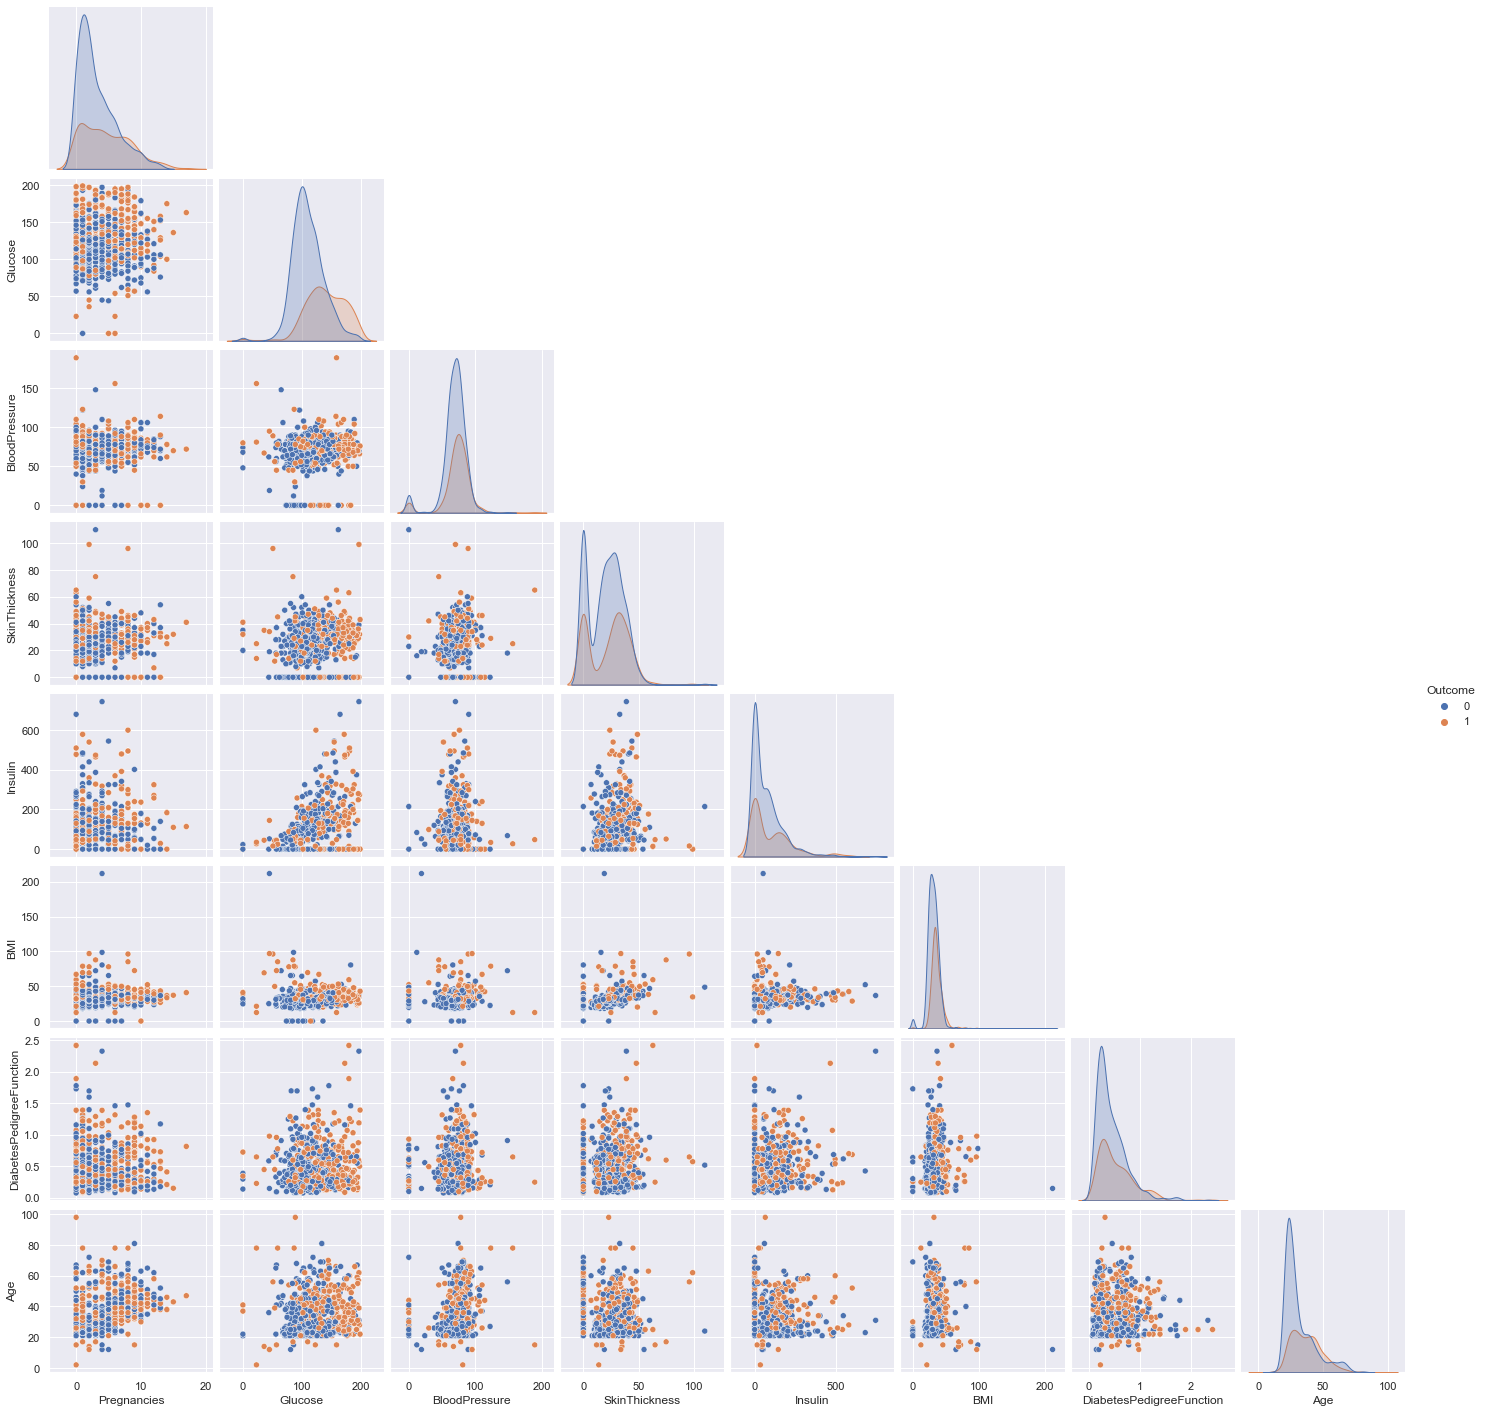

In [19]:
plt.figure(figsize=(12, 10))
sns.pairplot(data=df, hue="Outcome", corner=True, diag_kind="kde")

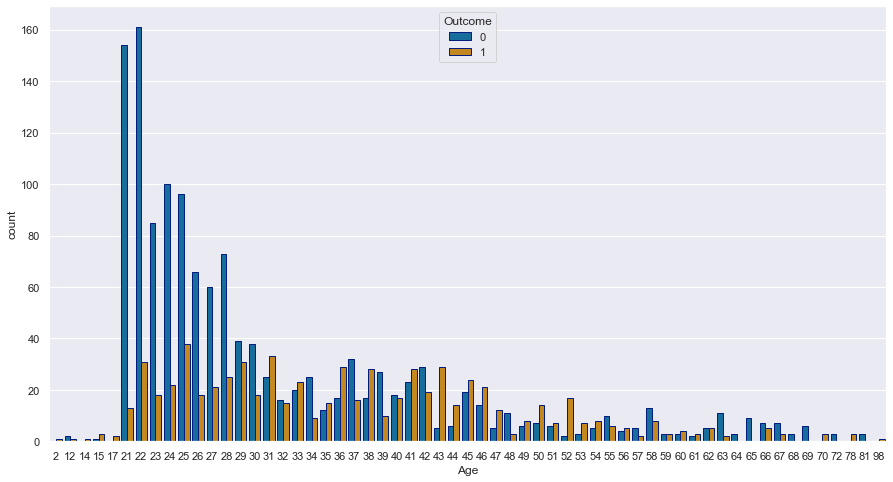

In [20]:
sns.countplot(x='Age',hue='Outcome',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))
sns.set(rc = {'figure.figsize':(15,8)})

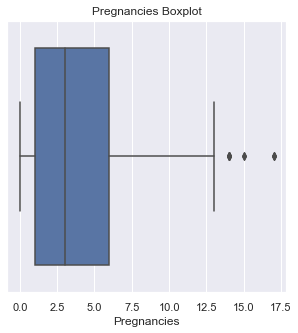

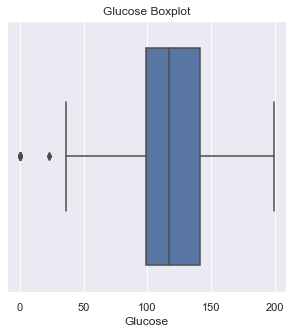

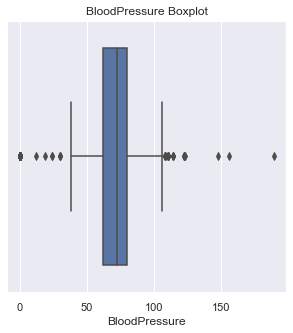

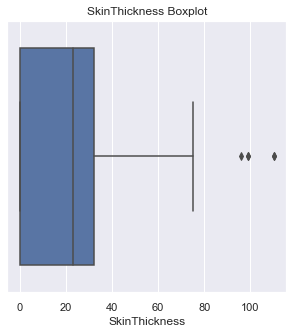

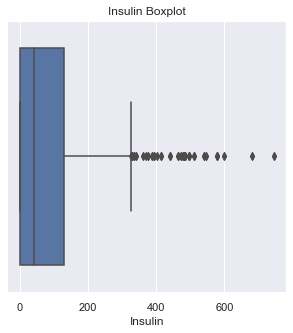

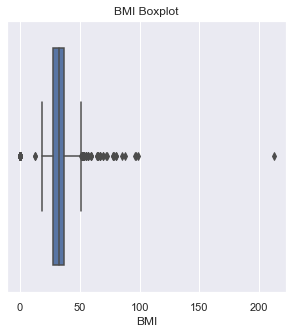

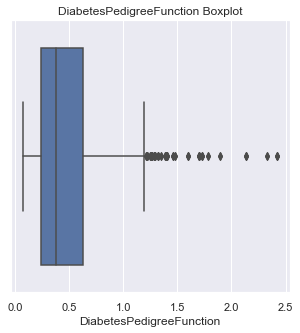

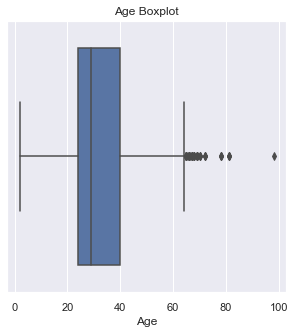

In [21]:
for column in df.columns[:-1]:
    plt.figure(figsize=(5, 5))
    plt.title(f"{column} Boxplot")
    sns.boxplot(data=df, x=column)

In [22]:
for column in df.columns[:-1]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_range = (df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    num_outliers = df[column][outlier_range].count()
    
    print(f"{column}: {num_outliers} outliers")

Pregnancies: 12 outliers
Glucose: 15 outliers
BloodPressure: 119 outliers
SkinThickness: 5 outliers
Insulin: 73 outliers
BMI: 74 outliers
DiabetesPedigreeFunction: 68 outliers
Age: 53 outliers


In [23]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=0)

In [24]:
train_df["Outcome"].value_counts()

0    981
1    537
Name: Outcome, dtype: int64

In [25]:
train_dups = train_df[train_df.duplicated(subset=None, keep='first')]
healthy_dups = train_dups.loc[train_df["Outcome"] == 0].index
train_df = train_df.drop(healthy_dups)

In [26]:
X_train, y_train = train_df.drop(columns=["Outcome"], axis=1), train_df["Outcome"]
X_test, y_test = test_df.drop(columns=["Outcome"], axis=1), test_df["Outcome"]

In [27]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
def get_train_test_accuracy(X_train, y_train, X_test, y_test, model, param_grid):
    params = ParameterGrid(param_grid)

    mean_cv_scores = [] 
    for param in params:
        clf = model(**param)
        cv_scores = cross_val_score(
                estimator=clf,
                X=X_train,
                y=y_train,
                scoring="accuracy",
                cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10),
        )
        mean_cv_score = np.mean(cv_scores)
        mean_cv_scores.append(mean_cv_score)
    best_model_index = np.argmax(mean_cv_scores)
    best_mean_cv_score = round(mean_cv_scores[best_model_index] * 100, 3)
    best_params = params[best_model_index]
    best_clf = model(**best_params)
    best_clf.fit(X_train, y_train)

    train_pred = best_clf.predict(X_train)
    test_pred = best_clf.predict(X_test)

    train_acc = round(accuracy_score(y_train, train_pred) * 100, 3)
    test_acc = round(accuracy_score(y_test, test_pred) * 100, 3)

    return train_acc, best_mean_cv_score, test_acc


In [30]:
model_names = [
    "KNN",
    "Decision Tree",
    "Logisitc Regression",
    "SVM",
    "Random Forest"
]
model_classes = [
    KNeighborsClassifier,
    DecisionTreeClassifier,
    LogisticRegression,
    SVC,
    RandomForestClassifier
]

param_grids = [
    {"n_neighbors": np.arange(1, 6, 1)},
    {"max_depth": [i for i in range(1, 11)] + [None]},
    {"C": np.arange(0.1, 5.1, 0.1)},
    {"C": np.arange(0.1, 5.1, 0.1)},
    {"n_estimators": np.arange(250, 325, 25)}
]

results = []
for model_name, model_class, param_grid in zip(model_names, model_classes, param_grids):
    train_acc, mean_val_acc, test_acc = get_train_test_accuracy(X_train, y_train, X_test, y_test, model_class, param_grid)
    
    results.append([model_name, train_acc, mean_val_acc, test_acc])

final_df = pd.DataFrame(results, columns=["Model","Training Accuracy","Mean Validation Accuracy", "Test Accuracy"])
final_df

,Model,Training Accuracy,Mean Validation Accuracy,Test Accuracy
0,KNN,100.000,83.652,96.245
1,Decision Tree,100.000,82.816,97.233
2,Logisitc Regression,75.124,75.065,73.320
3,SVM,87.164,78.229,83.202
4,Random Forest,100.000,85.005,96.047


In [31]:
classifier = RandomForestClassifier(n_estimators=200,criterion='entropy')

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
score = accuracy_score(y_test,y_pred)
score

0.9644268774703557

In [34]:
print(confusion_matrix(y_test,y_pred))

[[329  12]
 [  6 159]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       341
           1       0.93      0.96      0.95       165

    accuracy                           0.96       506
   macro avg       0.96      0.96      0.96       506
weighted avg       0.97      0.96      0.96       506



In [36]:
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

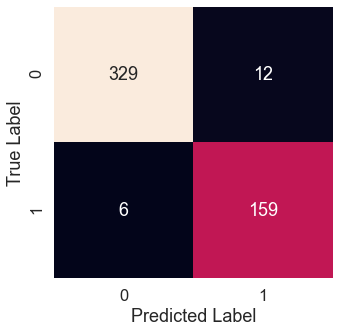

In [37]:
conf_matrix(y_test,y_pred)

In [38]:
Rclf=RandomForestClassifier()

In [39]:
Rclf.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
Rclf.score(X_test,y_test)

0.9624505928853755

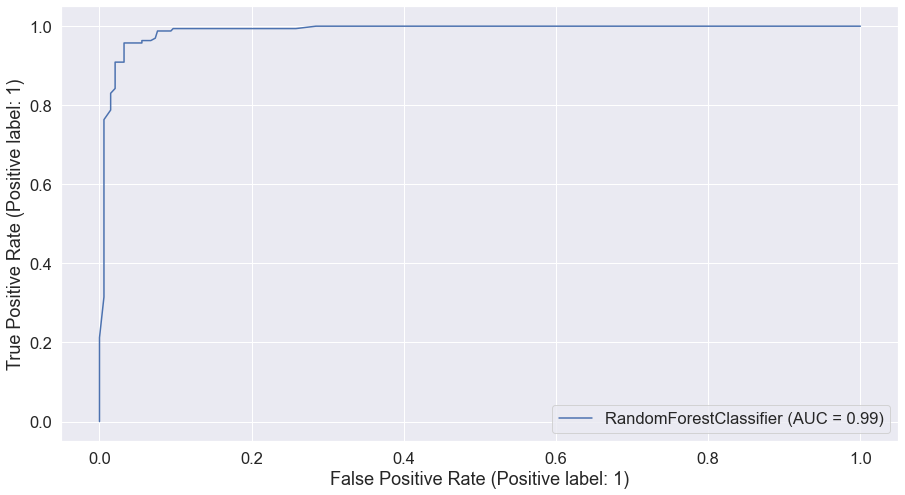

In [41]:
plot_roc_curve(Rclf, X_test,y_test);

In [42]:
train_scores = []

test_scores = []

neighbors = range(1, 21) # 1 to 20

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))

In [43]:
train_scores

[1.0,
 0.9711442786069652,
 0.8985074626865671,
 0.8616915422885573,
 0.8288557213930349,
 0.8059701492537313,
 0.7940298507462686,
 0.7890547263681592,
 0.7970149253731343,
 0.7800995024875622,
 0.7840796019900498,
 0.7751243781094528,
 0.7810945273631841,
 0.7701492537313432,
 0.7751243781094528,
 0.7661691542288557,
 0.7691542288557214,
 0.7592039800995025,
 0.7611940298507462,
 0.7582089552238805]

In [44]:
knn.score(X_train,y_train)

0.7582089552238805

Maximum KNN score on the test data: 96.25%


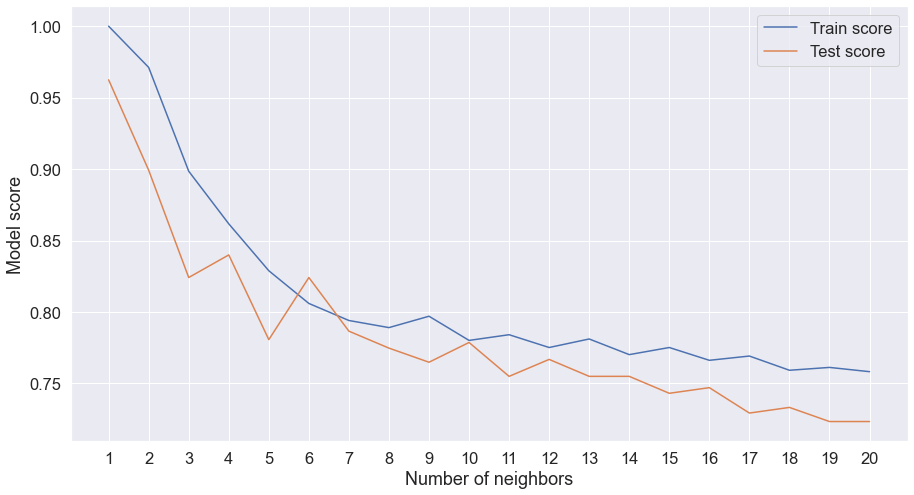

In [45]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

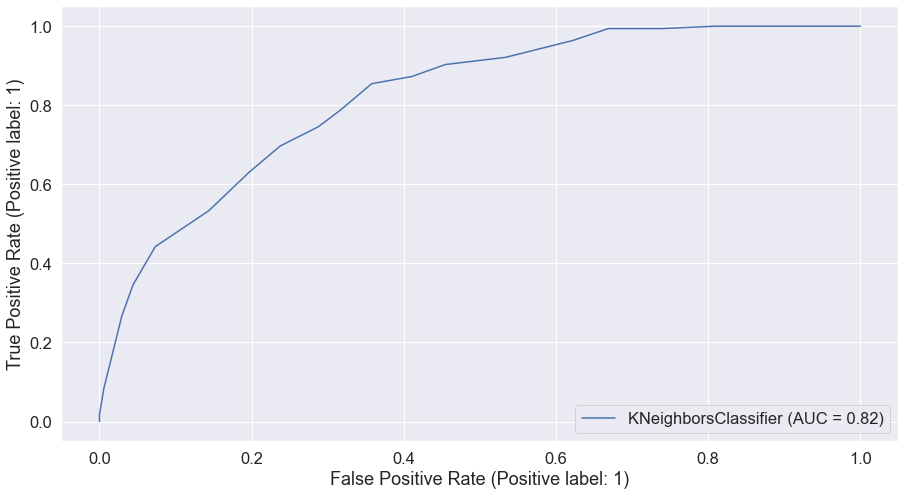

In [46]:
plot_roc_curve(knn, X_test, y_test);

In [47]:
y_pred=knn.predict(X_test)

In [48]:
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_pred):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_pred),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

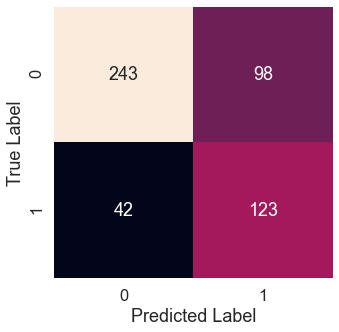

In [49]:
conf_matrix(y_test,y_pred)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.78       341
           1       0.56      0.75      0.64       165

    accuracy                           0.72       506
   macro avg       0.70      0.73      0.71       506
weighted avg       0.76      0.72      0.73       506



In [51]:
Clf=DecisionTreeClassifier()

In [52]:
Clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
Clf.score(X_train,y_train)

1.0

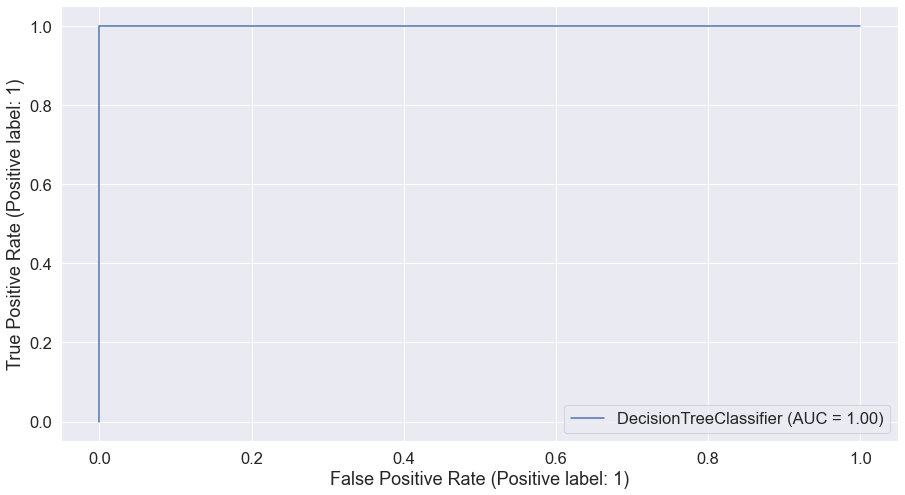

In [54]:
plot_roc_curve(Clf, X_train,y_train);

In [55]:
y_pred=Clf.predict(X_test)

In [56]:
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_pred):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_pred),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

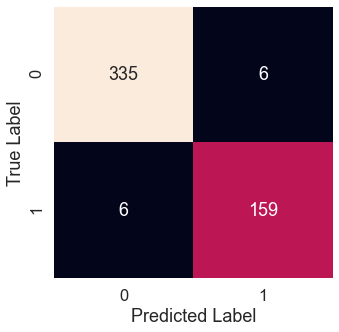

In [57]:
conf_matrix(y_test,y_pred)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       341
           1       0.96      0.96      0.96       165

    accuracy                           0.98       506
   macro avg       0.97      0.97      0.97       506
weighted avg       0.98      0.98      0.98       506



In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.023715415019762844
Mean Squared Error: 0.023715415019762844
Root Mean Squared Error: 0.15399810070180361
